In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [14]:
df_no_casualties = pd.read_csv("Sim_only_large_injection_of_air")
df_no_casualties.head(1)

,Time,pH,Hydrogen,Total Gas,Temperature,Pressure,Radioactivity,Power,Reactor Safety,Injection of Air,Injection of Air Degree,Resin Overheat,Resin Overheat Degree,Fuel Element Failure,Fuel Element Failure Degree,Chemical Addition,Vent Gas
0,0,11.0,50.0,60.0,500.0,2100.0,10.0,100.0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [ ]:
first_500 = df_no_casualties.iloc[200:722]
scaler = StandardScaler()

num_data = first_500[["pH", "Hydrogen", "Total Gas", "Temperature", "Pressure", "Radioactivity"]]

data_s = scaler.fit_transform(num_data)
data_s = pd.DataFrame(data_s, columns = num_data.columns)
data_s["Time"] = first_500["Time"]
data_s.head(1)

,pH,Hydrogen,Total Gas,Temperature,Pressure,Radioactivity
0,1.010406,0.550626,0.271623,-1.141979,-1.52885,0.0


In [ ]:

# Parameters over time with no casualties
data_s.plot(x = data_s["Time"], figsize = (10, 6))
plt.title("Large Injection of Air Casualty")
plt.xlabel("Time (min)")
plt.ylabel("Normalized Features")
plt.legend(title = "Features")
plt.show();


KeyError: "None of [Index([200, 201, 202, 203, 204, 205, 206, 207, 208, 209,\n       ...\n       712, 713, 714, 715, 716, 717, 718, 719, 720, 721],\n      dtype='int64', length=522)] are in the [columns]"

/home/rigpin2014/miniconda3/envs/msse-python/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rigpin2014/miniconda3/envs/msse-python/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rigpin2014/miniconda3/envs/msse-python/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/rigpin2014/miniconda3/envs/msse-python/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWar

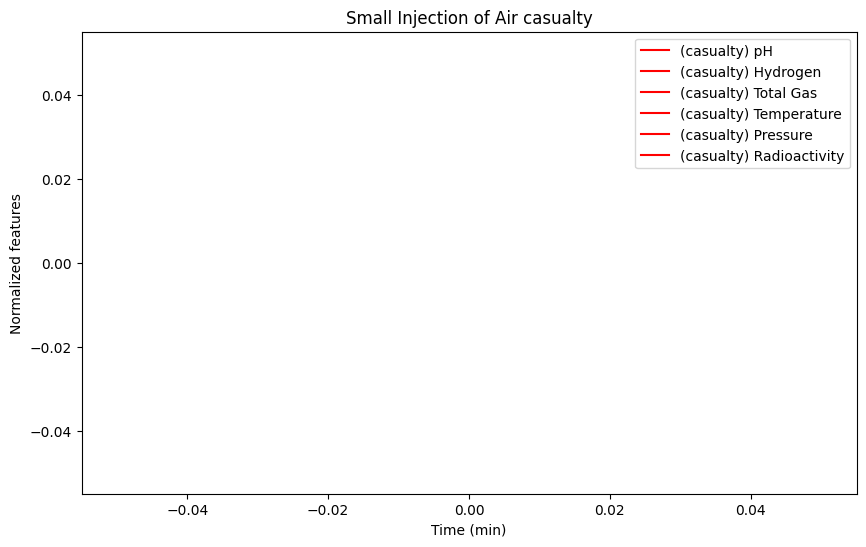

In [24]:
# Small injection of air
small_injection_data = data.iloc[380:500]
normal_data = data_s.iloc[380:500]
small_injection = small_injection_data[["pH", "Hydrogen", "Total Gas", "Temperature", "Pressure", "Radioactivity"]]

scaler_2 = StandardScaler()
small_injection_s = scaler.transform(small_injection)
small_injection_s = pd.DataFrame(small_injection_s, columns = small_injection.columns)

plt.figure(figsize=(10,6))
#for col in normal_data.columns:
    #sns.lineplot(x = data["Time"].iloc[380:500],
                 #y = col, 
                 #data = normal_data, 
                 #label = f"(normal) {col}", 
                 #color = 'blue')

for col in small_injection.columns:
    sns.lineplot(x = data["Time"].iloc[380:500],
                 y = small_injection_s[col],
                 data = small_injection_s,
                 label = f"(casualty) {col}",
                 color = 'red')

plt.title("Small Injection of Air casualty")
plt.xlabel("Time (min)")
plt.ylabel("Normalized features")
plt.legend()
plt.show();